<h1><center><font color='green'>Concevez une application au service de la santé publique</font></center></h1>

# Notebook de nettoyage 

## Objectif :
- Proposer une idée d'application en lien avec l'alimentation.
- Nettoyer les données et repérer les variables pertinentes nécessaires pour l'idée d'application.
- Automatiser les traitements réalisés.

## 1. Importer les données 

In [2]:
# importer les librairies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import csv

In [3]:
# importer la base de donnée 
df = pd.read_csv (r'./fr.openfoodfacts.org.products.csv', delimiter = '\t')

C:\Users\chouc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.shape

(320772, 162)

In [5]:
print(df.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_fr' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_fr' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_fr' 'ingredients_text' 'allergens'
 'allergens_fr' 'traces' 'traces_tags' 'traces_fr' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_fr'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' 

## 2. Analyse des valeurs manquantes - Elimination des colonnes inutiles :


In [6]:
# somme des valeurs nulles de chaque variable
df.isnull().sum()[0:50]

code                                           23
url                                            23
creator                                         2
created_t                                       3
created_datetime                                9
last_modified_t                                 0
last_modified_datetime                          0
product_name                                17762
generic_name                               267977
quantity                                   215953
packaging                                  241812
packaging_tags                             241811
brands                                      28412
brands_tags                                 28420
categories                                 236362
categories_tags                            236383
categories_fr                              236361
origins                                    298582
origins_tags                               298619
manufacturing_places                       284271


In [7]:
print((df.isnull().sum()[50:100]/len(df))*100)

ingredients_that_may_be_from_palm_oil         100.000000
ingredients_that_may_be_from_palm_oil_tags     96.353796
nutrition_grade_uk                            100.000000
nutrition_grade_fr                             31.038245
pnns_groups_1                                  71.471014
pnns_groups_2                                  70.542628
states                                          0.014340
states_tags                                     0.014340
states_fr                                       0.014340
main_category                                  73.699076
main_category_fr                               73.699076
image_url                                      76.358286
image_small_url                                76.358286
energy_100g                                    18.598568
energy-from-fat_100g                           99.732832
fat_100g                                       23.967491
saturated-fat_100g                             28.437021
butyric-acid_100g              

In [8]:
pourcent_vide = 98
cols_moins_vides = [c for c in df.columns if df[c].isnull().sum()/len(df)*100 < pourcent_vide]

In [9]:
print(cols_moins_vides)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy_100g', 'fat_100g', 'saturated-fat_100

In [10]:
len(cols_moins_vides)

81

In [11]:
df_moins_vides = df[cols_moins_vides]

In [12]:
df_moins_vides.shape

(320772, 81)

## 3. Examen et nettoyage de la colonne 'countries' :

 ##### - Choix de la colonne 'countries' pour avoir une idée sur les pays d'origine des produits disponibles sur le site Open Food Facts : 
 
 
 
 
 
 

In [13]:
df_moins_vides['countries'].unique()[0:600]

array(['en:FR', 'US', 'France', 'en:GB', 'France, US', 'Canada',
       'United Kingdom', 'en:CH', 'en:ES', 'Deutschland', 'en:SI',
       'en:DE', 'en:IT', 'en:RO', 'España', 'en:AU', 'en:PT',
       'United States', 'Germany', 'Usa', 'France,Royaume-Uni',
       'UK,France', 'France,Belgique,Pays-Bas,Royaume-Uni',
       'France,United Kingdom', 'en:GP', 'France,UK', 'États-Unis',
       'Royaume-Uni,France', 'en:CA', nan, 'en:US,United Kingdom',
       'Switzerland', 'en:US', 'en:CA, US', 'Nederland',
       'en:AU, en:france', 'Australia', 'France,Suisse,États-Unis,Canada',
       'États-Unis, en:france, US', 'Ireland', 'United Kingdom, US',
       'en:RE, en:france', 'United States, en:france', 'en:TW',
       'en:AU, Suisse', 'Deutschland, en:france', 'Suisse', 'en:BR',
       'Belgique,France', 'en:DO', 'en:FR, US',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'France,United States',
       'Australie, US', 'USA', 'en:SA', 'Saudi Arabia', 'en:AE', 'en:IQ',
       'en:KW', 'Rep

====== On remarque qu'il y a beaucoup d'abbrevations des noms de pays et qui se référent aux pays déja existants dans la colonne donc on pourra changer l'abrévition par le nom complet du pays, on évitera alors davoir le même pays sous plusieurs noms dans la même colonne. ======

In [14]:
abbreviation= ['en:AD', 'en:AE', 'en:AF', 'en:AG', 'en:AI', 'en:AL', 'en:AM', 'en:AO' ,'en:AQ', 'en:AR', 'en:AS', 'en:AT', 'en:AU', 'en:AW','en:AX', 'en:AZ', 'en:BA', 'en:BB','en:BD', 'en:BE','en:BF', 'en:BG', 'en:BH', 'en:BI', 'en:BJ', 'en:BL', 'en:BM', 'en:BN', 'en:BO', 'en:BQ', 'en:BR', 'en:BS', 'en:BT', 'en:BV', 'en:BW', 'en:BY', 'en:BZ', 'en:CA', 'en:CC', 'en:CD', 'en:CF', 'en:CG', 'en:CH', 'en:CI', 'en:CK', 'en:CL', 'en:CM', 'en:CN', 'en:CO', 'en:CR', 'en:CU', 'en:CV', 'en:CW', 'en:CX', 'en:CY', 'en:CZ', 'en:DE', 'en:DJ', 'en:DK', 'en:DM', 'en:DO' 'en:DZ', 'en:EC', 'en:EE', 'en:EG', 'en:EH', 'en:ER', 'en:ES', 'en:ET', 'en:FI','en:FJ', 'en:FK', 'en:FM', 'en:FO', 'en:FR', 'en:GA', 'en:GB', 'en:GD', 'en:GE', 'en:GF', 'en:GG', 'en:GH', 'en:GI', 'en:GL', 'en:GM', 'en:GN', 'en:GP', 'en:GQ', 'en:GR', 'en:GS', 'en:GT', 'en:GU', 'en:GW','en:GY', 'en:HK', 'en:HM', 'en:HN', 'en:HR', 'en:HT', 'en:HU', 'en:ID', 'en:IE', 'en:IL', 'en:IM', 'en:IN', 'en:IO', 'en:IQ', 'en:IR', 'en:IS', 'en:IT', 'en:JE', 'en:JM', 'en:JO', 'en:JP', 'en:KE', 'en:KG', 'en:KH', 'en:KI', 'en:KM', 'en:KN', 'en:KP', 'en:KR', 'en:KW', 'en:KY', 'en:KZ' ,'en:LA', 'en:LB', 'en:LC', 'en:LI', 'en:LK', 'en:LR', 'en:LS', 'en:LT', 'en:LU', 'en:LV', 'en:LY', 'en:MA', 'en:MC', 'en:MD', 'en:ME', 'en:MF', 'en:MG', 'en:MH', 'en:MK', 'en:ML', 'en:MM', 'en:MN', 'en:MO', 'en:MP', 'en:MQ', 'en:MR', 'en:MS', 'en:MT', 'en:MU', 'en:MV', 'en:MW', 'en:MX', 'en:MY', 'en:MZ','en:NA', 'en:NC', 'en:NE', 'en:NF', 'en:NG', 'en:NI', 'en:NL', 'en:NO', 'en:NP', 'en:NR', 'en:NU', 'en:NZ', 'en:OM','en:PA', 'en:PE', 'en:PF', 'en:PG', 'en:PH', 'en:PK', 'en:PL', 'en:PM', 'en:PN', 'en:PR', 'en:PS', 'en:PT', 'en:PW', 'en:PY','en:QA', 'en:RE','en:RO', 'en:RS', 'en:RU', 'en:RW','en:SA', 'en:SB', 'en:SC', 'en:SD', 'en:SE', 'en:SG', 'en:SH', 'en:SI', 'en:SJ', 'en:SK', 'en:SL', 'en:SM', 'en:SN', 'en:SO', 'en:SR', 'en:SS', 'en:ST', 'en:SV', 'en:SX', 'en:SY', 'en:SZ', 'en:TC', 'en:TD', 'en:TF', 'en:TG', 'en:TH', 'en:TJ', 'en:TK', 'en:TL', 'en:TM', 'en:TN', 'en:TO','en:TR', 'en:TT', 'en:TV', 'en:TW', 'en:TZ', 'en:UA', 'en:UG', 'en:UM', 'en:US', 'en:UY', 'en:UZ','en:VA', 'en:VC', 'en:VE', 'en:VG', 'en:VI', 'en:VN', 'en:VU', 'en:WF', 'en:WS', 'en:YE','en:YT', 'en:ZA', 'en:ZM','en:ZW']

In [15]:
df_moins_vides['countries']= df_moins_vides['countries'].replace(['en:FR', 'en:CH', 'en:ES', 'en:SI', 'en:DE', 'en:IT',
       'en:RO', 'en:AU', 'en:PT', 'en:GP', 'en:CA', 'en:US', 'en:TW',
       'en:BR', 'en:SA', 'en:AE', 'en:IQ', 'en:KW', 'en:NC', 'en:FI',
       'en:SG', 'en:PF', 'en:PA', 'en:CR', 'en:MX', 'en:TH', 'en:CN',
       'en:LU', 'en:LB', 'en:BE', 'en:MQ', 'en:BB', 'en:AW', 'en:NO',
       'en:HT', 'en:MA', 'en:KR', 'en:HK', 'en:TT', 'en:GN', 'en:RU',
       'en:PM', 'en:CZ', 'en:MU', 'en:CI', 'en:PL', 'en:GR', 'en:IN',
       'en:EC', 'en:AR', 'en:SE', 'en:AT', 'en:JO', 'en:JP', 'en:IL',
       'en:IE', 'en:TN', 'en:CL', 'en:NL', 'en:BG', 'en:HU', 'en:RE',
       'en:MC', 'en:NG', 'en:HN', 'en:EG', 'en:VE', 'en:PH', 'en:MM',
       'en:BH', 'en:PK', 'en:ID', 'en:DK', 'en:SK', 'en:CO', 'en:RS',
       'en:UA', 'en:AL', 'en:MT', 'en:HR', 'en:MW', 'en:MY', 'en:GF',
       'en:YT', 'en:QA', 'en:AD', 'en:WF', 'en:NE', 'en:MF',
       'en:BA', 'en:BY', 'en:KH', 'en:MR', 'en:IR', 'en:CY', 'en:VN',
       'en:AZ', 'en:LT', 'en:ZA', 'en:GA', 'en:KZ', 'en:MN', 'en:TD',
       'en:EE', 'en:LV', 'en:LK', 'en:LY', 'en:JE', 'en:CD', 'en:GH',
       'en:GW', 'en:AO', 'en:IS', 'en:BF', 'en:CM', 'en:MZ', 'en:RW',
       'en:BN', 'en:OM', 'en:SO', 'en:VU', 'en:UY', 'en:PE', 'en:PY',
       'en:TZ', 'en:TR', 'en:ET', 'en:CK', 'en:SV', 'en:GT', 'en:NZ',
       'en:MV'],['France', 'Suisse', 'Espagne', 'Slovénie', 'Allemagne', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France', 'Canada', 'Etas-Unis', 'Taïwan',
       'Brésil', 'Arabie saoudite', 'Emirats arabes', 'Irak', 'Koweit', 'France', 'Finlande',
       'Singapour', 'France', 'Panama', 'Costa Rica', 'Mexique', 'Thaïlande', 'Chine',
       'Luxembourg', 'Liban', 'Belgique', 'France', 'Barbade', 'Royaume des pays bas', 'Norvège',
       'Haïti', 'Maroc', 'Corée du Sud', 'Hong Kong', 'Trinité-et-Tobago', 'Guinée', 'Russie',
       'France', 'République tchèque', 'Maurice', 'Côte d’Ivoire', 'Pologne', 'Gréce', 'Inde',
       'l’Équateur', 'Argentine', 'Suède', 'Autriche', 'Jordanie', 'Kunrei-shiki', 'Israël',
       'Irlande', 'Tunisie', 'Chili', 'Royaume des pays-bas', 'Bulgarie', 'Hongrie', 'France',
       'Monaco', 'Nigeria', 'Honduras', 'Egypte', 'Venezuela', 'Philippines', 'Birmanie',
       'Bahrein', 'Pakistan', 'Indonésie', 'Danemak', 'Slovaqie', 'Colombie', 'Serbie',
       'Ukranie', 'Albanie', 'Malte', 'Croatie', 'Malawi', 'Malaisie', 'France', 'France', 'Qatar', 'Andorre', 'France', 'Niger', 'France',
       'Bosnie-Herzégovine', 'Bélarus', 'Cambodge', 'Mauritanie', 'Iran', 'Chypre', 'Vietnam',
       'Azerbaïdjan', 'Lutuanie', 'Afrique du sud', 'Gabon', 'Kazakhastan', 'Mongolie', 'Tchad',
       'Estonie', 'Lettonie', 'Sri Lanka', 'Libye', 'Bailliage de Jersey', 'Congo', 'Ghana',
       'Guinée-Bissau', 'Australie', 'Islande', 'Burkina Faso', 'Cameroun', 'Mozambique', 'Rwanda',
       'Brunei', 'Oman', 'Somalie', 'Vanuatu', 'Uruguay', 'Pérou', 'Paraguay',
       'Tanzanie', 'Turquie', 'Ethiopie', 'Iles cook', 'Salvador', 'Guatemala', 'Nouvelle-Zélande',
       'Maldives'])

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15836/667122657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moins_vides['countries']= df_moins_vides['countries'].replace(['en:FR', 'en:CH', 'en:ES', 'en:SI', 'en:DE', 'en:IT',


In [16]:
df_moins_vides['countries'].unique()[0:600]

array(['France', 'US', 'en:GB', 'France, US', 'Canada', 'United Kingdom',
       'Suisse', 'Espagne', 'Deutschland', 'Slovénie', 'Allemagne',
       'Italie', 'Roumanie', 'España', 'Australie', 'Portugal',
       'United States', 'Germany', 'Usa', 'France,Royaume-Uni',
       'UK,France', 'France,Belgique,Pays-Bas,Royaume-Uni',
       'France,United Kingdom', 'France,UK', 'États-Unis',
       'Royaume-Uni,France', nan, 'en:US,United Kingdom', 'Switzerland',
       'Etas-Unis', 'en:CA, US', 'Nederland', 'en:AU, en:france',
       'Australia', 'France,Suisse,États-Unis,Canada',
       'États-Unis, en:france, US', 'Ireland', 'United Kingdom, US',
       'en:RE, en:france', 'United States, en:france', 'Taïwan',
       'en:AU, Suisse', 'Deutschland, en:france', 'Brésil',
       'Belgique,France', 'en:DO', 'en:FR, US',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'France,United States',
       'Australie, US', 'USA', 'Arabie saoudite', 'Saudi Arabia',
       'Emirats arabes', 'Irak', 'Kowe

===== On parcourant la colonne 'countries' on remarque qu'il y a des erreurs de saisie, on peurra alors les eliminer ====== 

In [17]:
erreur_saisie=['en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded',
       'en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded',
       'en:to-be-cn:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded',
       'en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded',
       'en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:packaging-code-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded',
       'en:to-be-completed,en:nutrition-facts-completed,ehecked,en:complete,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded']

In [18]:
df_moins_vides1 = df_moins_vides[~df_moins_vides['countries'].isin(erreur_saisie)]

In [19]:
df_moins_vides1['countries'].unique()[0:600]

array(['France', 'US', 'en:GB', 'France, US', 'Canada', 'United Kingdom',
       'Suisse', 'Espagne', 'Deutschland', 'Slovénie', 'Allemagne',
       'Italie', 'Roumanie', 'España', 'Australie', 'Portugal',
       'United States', 'Germany', 'Usa', 'France,Royaume-Uni',
       'UK,France', 'France,Belgique,Pays-Bas,Royaume-Uni',
       'France,United Kingdom', 'France,UK', 'États-Unis',
       'Royaume-Uni,France', nan, 'en:US,United Kingdom', 'Switzerland',
       'Etas-Unis', 'en:CA, US', 'Nederland', 'en:AU, en:france',
       'Australia', 'France,Suisse,États-Unis,Canada',
       'États-Unis, en:france, US', 'Ireland', 'United Kingdom, US',
       'en:RE, en:france', 'United States, en:france', 'Taïwan',
       'en:AU, Suisse', 'Deutschland, en:france', 'Brésil',
       'Belgique,France', 'en:DO', 'en:FR, US',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'France,United States',
       'Australie, US', 'USA', 'Arabie saoudite', 'Saudi Arabia',
       'Emirats arabes', 'Irak', 'Kowe

====== corriger la forme des nom de pays qui commencent par "en:" =======

In [20]:
# corriger en:nom-pays

In [21]:
df_moins_vides1['countries'].str.count(r'(^en:.*)').sum()

2254.0

In [ ]:
df_moins_vides1['countries'][df_moins_vides1['countries'].str.match(r'(^en:.*)')==True]

In [23]:
df_moins_vides1[df_moins_vides1['countries'].str.match('^en:.*')== True]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
47,27083,http://world-fr.openfoodfacts.org/produit/0000...,canieatthis-app,1472223782,2016-08-26T15:03:02Z,1472223782,2016-08-26T15:03:02Z,Marks % Spencer 2 Blueberry Muffins,NaN,230g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,50913,http://world-fr.openfoodfacts.org/produit/0000...,canieatthis-app,1483186707,2016-12-31T12:18:27Z,1483186708,2016-12-31T12:18:28Z,"M&S Extrenely Chocolatey Milk, Dark & White Ch...",NaN,500g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,56434,http://world-fr.openfoodfacts.org/produit/0000...,canieatthis-app,1468005372,2016-07-08T19:16:12Z,1468005372,2016-07-08T19:16:12Z,diet lemonade by Sainsbury's,NaN,2l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,673358,http://world-fr.openfoodfacts.org/produit/0000...,canieatthis-app,1483117649,2016-12-30T17:07:29Z,1483117649,2016-12-30T17:07:29Z,Veggie Colin the Caterpillar,NaN,170g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,1471762,http://world-fr.openfoodfacts.org/produit/0000...,canieatthis-app,1470247218,2016-08-03T18:00:18Z,1470247218,2016-08-03T18:00:18Z,still Scottish water,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320633,9556174300404,http://world-fr.openfoodfacts.org/produit/9556...,openfoodfacts-contributors,1407860298,2014-08-12T16:18:18Z,1480084690,2016-11-25T14:38:10Z,quaker 100% natural oat and honey cereal,NaN,369g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320682,96068885,http://world-fr.openfoodfacts.org/produit/9606...,kyzh,1430468566,2015-05-01T08:22:46Z,1430468609,2015-05-01T08:23:29Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320697,96100714,http://world-fr.openfoodfacts.org/produit/9610...,kyzh,1433449976,2015-06-04T20:32:56Z,1433450107,2015-06-04T20:35:07Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320704,96139288,http://world-fr.openfoodfacts.org/produit/9613...,openfoodfacts-contributors,1488116866,2017-02-26T13:47:46Z,1488116866,2017-02-26T13:47:46Z,Eat Natural yoghurt coated coconut and apricot,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_moins_vides1['countries'].replace('(en:)','',regex=True, inplace = True)

C:\Users\chouc\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
df_moins_vides1['countries'].unique()[1000:3000]

array(['العراق,المملكة المتحدة, france',
       'Algérie,Belgique,France,Allemagne,Guadeloupe,Italie,Liban,Luxembourg,Martinique,Maroc,Pays-Bas,Portugal,La Réunion,Sénégal,Espagne,Suisse,Royaume-Uni',
       'Belgique,France,Italie,Suisse',
       'Czech Republic,France,Switzerland',
       'France,United Kingdom, belgium', 'Belgique,France,Serbie,Suisse',
       'Portugal, france, switzerland', 'Portugal, España', 'PT, Suisse',
       'Portugal, Suisse', 'Portugal,france', 'Switzerland,France',
       'Brasil, Suisse', 'PT, france',
       'França,Alemanha,Portugal,Reino Unido', 'Portugal,Suisse,France',
       'Sweden, denmark', 'Finlande,France',
       'de:Frankreich,de:Deutschland', 'Denmark,Germany',
       'Denmark,Sweden', 'Azərbaycan', 'Azerbaijan', 'البحرين',
       'Dänemark,Deutschland', 'Germany,Deutschland', 'Россия, france',
       'Polska, france', 'Danemark,Finlande,France',
       'Polska,Wielka Brytania', 'Польша,Великобритания',
       'United Kingdom,poland', 'Unit

In [26]:
df_moins_vides1['countries'].str.count(r'(^en:.*)').sum()

0.0

In [27]:
# Les pays les plus représentés 

<AxesSubplot:ylabel='countries'>

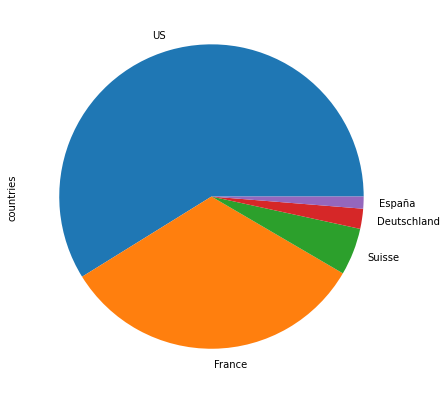

In [44]:
df_moins_vides1['countries'].value_counts()[0:5].plot.pie(figsize=(7, 7))

In [40]:
import pickle
path = r'C:\Users\chouc\openclassrooms\projet3\model\data.pickle'
df_moins_vides1.to_pickle(path)